In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import pylab as pl
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('S:/Stevens/2nd Semester/MGT-809/ProductionData_809B.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrderEntryDate       9970 non-null   object 
 1   OrginalScheduleDate  9970 non-null   object 
 2   ActualStartDate      9970 non-null   object 
 3   ReleaseDate          9970 non-null   object 
 4   BatchNumber          9970 non-null   object 
 5   CustItem             9969 non-null   object 
 6   Dryer                9970 non-null   object 
 7   Flow                 9946 non-null   object 
 8   Hygroscopicity       9946 non-null   object 
 9   Bulk Density         3859 non-null   object 
 10  Moisture             9953 non-null   object 
 11  ScheduledDryQty      9969 non-null   float64
 12  ActualDryQty         9956 non-null   float64
 13  YieldPercentage      9961 non-null   float64
 14  DryingTime_Hrs       9970 non-null   float64
 15  CleanTime_Hrs        9970 non-null   f

In [3]:
'''
There are 22 columes and 10 of them are numeric variables, 12 of them are categorical variables.
The dataset has no null values.
'''

'\nThere are 22 columes and 10 of them are numeric variables, 12 of them are categorical variables.\nThe dataset has no null values.\n'

In [4]:
train.head()

,OrderEntryDate,OrginalScheduleDate,ActualStartDate,ReleaseDate,BatchNumber,CustItem,Dryer,Flow,Hygroscopicity,Bulk Density,...,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,ttlBatches,ContainerNet,Container,ContainerID
0,12/3/15 9:54,1/2/16 9:46,1/2/16 8:54,12/31/15 14:14,NJSD313825,10013-0000,Dryer 04,Good,Medium,Target = 0.30 g/mL,...,105.5,2.4,5.1,0.0,7.5,Fragrance,1,110.200,ST Fiber Drums 41 Gal. (201508),90263
1,10/29/15 8:40,12/26/15 13:39,1/2/16 11:06,12/31/15 14:52,NJSD312807,10558-0000,Dryer 03,Good,Medium,Record,...,92.2,8.4,0.2,4.2,12.8,Fragrance,2,187.400,(305518M) ST Mauser 55 Gal Fiber Drums Blown-I...,500296
2,12/3/15 9:56,1/2/16 21:55,1/2/16 21:40,12/31/15 14:22,NJSD313826,10447-0000,Dryer 04,Good,Medium,NaN,...,88.4,9.7,5.7,0.9,16.2,Fragrance,1,57.225,ST Fiber Drums 41 Gal. (201508),90263
3,10/26/15 21:43,12/26/15 12:43,1/2/16 22:45,12/31/15 13:20,NJSD312677,24164-0000,Dryer 02,Good,Medium,NaN,...,93.0,54.2,11.1,7.6,72.8,Flavors,9,40.000,Cardboard Boxes (000240),120610
4,12/31/15 14:53,12/31/15 14:52,1/3/16 0:10,12/31/15 14:53,NJSD314508,10558-0000,Dryer 03,Good,Medium,Record,...,78.8,8.2,0.1,3.5,11.8,Fragrance,2,187.400,(305518M) ST Mauser 55 Gal Fiber Drums Blown-I...,500296


In [5]:
'''
Because the data is lack of Due date, the EDA is meanly focus on the dryer and to determine 
which arrtibue should be considered as the key performance Indicator.

As considered for the numeric data, the TotalRunTime_Hrs should be the most relavent arribute which will affect the schedule.

And I also considered about the dryer itself, which the related attributes will be analyzed below.
'''

'\nBecause the data is lack of Due date, the EDA is meanly focus on the dryer and to determine \nwhich arrtibue should be considered as the key performance Indicator.\n\nAs considered for the numeric data, the TotalRunTime_Hrs should be the most relavent arribute which will affect the schedule.\n\nAnd I also considered about the dryer itself, which the related attributes will be analyzed below.\n'

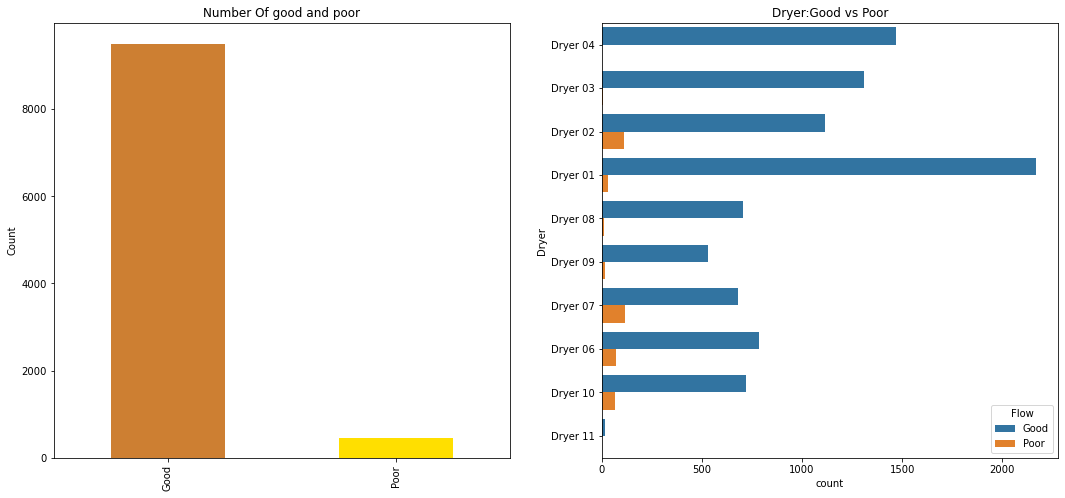

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Flow'].value_counts().plot.bar(color=['#CD7F32','#FFDF00'],ax = ax[0])
ax[0].set_title('Number Of good and poor')
ax[0].set_ylabel('Count')
sns.countplot(y = 'Dryer',hue='Flow',data=train,ax = ax[1])
ax[1].set_title('Dryer:Good vs Poor')
plt.show()

In [7]:
'''
From the visualization we can know almost 95% of the work flow is good, and Dryer 01 has the most good flow than other Dryers.
Dryer 04 has no poor flow.
Dryer 11 has the least working flow, it is more of like a spare dryer.
'''

'\nFrom the visualization we can know almost 95% of the work flow is good, and Dryer 01 has the most good flow than other Dryers.\nDryer 04 has no poor flow.\nDryer 11 has the least working flow, it is more of like a spare dryer.\n'

In [8]:
print('Highest yield percentage is of:',train['YieldPercentage'].max(),'%')
print('Lowest yield percentage is of:',train['YieldPercentage'].min(),'%')
print('Average yield percentage is of:',train['YieldPercentage'].mean(),'%')

Highest yield percentage is of: 864.9 %
Lowest yield percentage is of: 0.0 %
Average yield percentage is of: 91.2144664190345 %


In [9]:
'''
Consider about the yield percentage, the average yield percentage is above 90%, 
however the highest yield percentage is 864.9%, I considered it as an extrime error.
'''

'\nConsider about the yield percentage, the average yield percentage is above 90%, \nhowever the highest yield percentage is 864.9%, I considered it as an extrime error.\n'

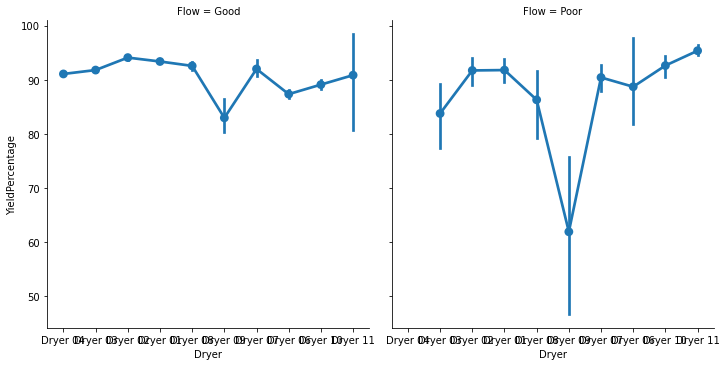

<Figure size 3600x3600 with 0 Axes>

In [10]:
sns.factorplot('Dryer','YieldPercentage',col='Flow',data=train)
plt.figure(figsize=(50, 50))
plt.show()

In [11]:
'''
The plot explains the performance of yield percentage under good flow and poor flow.
The Dryer 09's performance is unsatisfactory under both conditions.
'''

"\nThe plot explains the performance of yield percentage under good flow and poor flow.\nThe Dryer 09's performance is unsatisfactory under both conditions.\n"

In [12]:
pd.crosstab([train.Dryer],[train.Flow,train.Hygroscopicity],margins=True).style.background_gradient(cmap='summer_r')

In [13]:
'''
The crosstab explains the relationship between Hygroscopicity and dryers under the condition of good and poor flow.
The most need for high hygroscopicity concentrates on Dryer 06 and Dryer 09, and these two dryers are mainly processed with chemical
and food additive.(except for flavors)
'''

'\nThe crosstab explains the relationship between Hygroscopicity and dryers under the condition of good and poor flow.\nThe most need for high hygroscopicity concentrates on Dryer 06 and Dryer 09, and these two dryers are mainly processed with chemical\nand food additive.(except for flavors)\n'

In [14]:
train['ProdLine'].value_counts().to_frame().style.background_gradient(cmap='summer')

,ProdLine
Flavors,5332
Fragrance,2192
Chemical,713
Nutraceutical,689
Food Additive,494
Vitamin,279
Food Addit,124
Pharma,87
Cosmetic,51


In [15]:
'''
Over half of the prodlines are processing with the flavors.
'''

'\nOver half of the prodlines are processing with the flavors.\n'

In [16]:
data2 = train.groupby(['Dryer','ProdLine'])['ProdLine'].count()
data2 = pd.DataFrame(data2)
data2

ProdLine
Dryer    ProdLine               
Dryer 01 Chemical              6
         Cosmetic              1
         Flavors            1997
         Food Addit            6
         Food Additive       132
...                          ...
Dryer 10 Pharma                3
         Vitamin              82
Dryer 11 Flavors              18
         Food Addit            2
         Food Additive         2

[71 rows x 1 columns]

In [17]:
'''
The detail of the dryer vs prodline is in the Tableau.
'''

'\nThe detail of the dryer vs prodline is in the Tableau.\n'

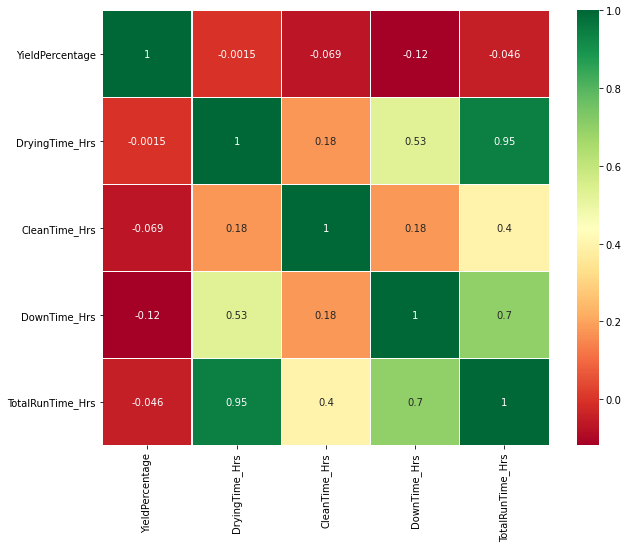

In [18]:
train2 = train[['YieldPercentage','DryingTime_Hrs','CleanTime_Hrs','DownTime_Hrs','TotalRunTime_Hrs']]
sns.heatmap(train2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [19]:
'''
From the correlation matrix we can conclude:
In order to raise the yield percentage, we should decrease the downtime hours.
Also shorter total run time will increase the yield percentage.
'''

'\nFrom the correlation matrix we can conclude:\nIn order to raise the yield percentage, we should decrease the downtime hours.\nAlso shorter total run time will increase the yield percentage.\n'

In [20]:
train['Operate region']=train['BatchNumber'].apply(lambda x:x.split('3')[0])
not_need = ['Flow','Hygroscopicity','Bulk Density','Moisture','ttlBatches','Container']
df = train.drop(not_need, axis = 1)
df[df['YieldPercentage'] > 100.000] = np.nan
df = df.dropna(how = 'all')
df.head()

,OrderEntryDate,OrginalScheduleDate,ActualStartDate,ReleaseDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,ContainerNet,ContainerID,Operate region
1,10/29/15 8:40,12/26/15 13:39,1/2/16 11:06,12/31/15 14:52,NJSD312807,10558-0000,Dryer 03,4270.4120,3935.3999,92.2,8.4,0.2,4.2,12.8,Fragrance,187.400,500296.0,NJSD
2,12/3/15 9:56,1/2/16 21:55,1/2/16 21:40,12/31/15 14:22,NJSD313826,10447-0000,Dryer 04,1353.0969,1195.9000,88.4,9.7,5.7,0.9,16.2,Fragrance,57.225,90263.0,NJSD
3,10/26/15 21:43,12/26/15 12:43,1/2/16 22:45,12/31/15 13:20,NJSD312677,24164-0000,Dryer 02,19549.0975,18185.1000,93.0,54.2,11.1,7.6,72.8,Flavors,40.000,120610.0,NJSD
4,12/31/15 14:53,12/31/15 14:52,1/3/16 0:10,12/31/15 14:53,NJSD314508,10558-0000,Dryer 03,4282.1720,3373.1999,78.8,8.2,0.1,3.5,11.8,Fragrance,187.400,500296.0,NJSD
5,11/8/15 21:33,11/22/15 21:32,1/3/16 4:40,12/31/15 13:03,NJSD313118,23142-0000,Dryer 01,14115.4267,13279.0996,94.1,43.7,5.3,0.7,49.7,Flavors,110.200,110259.0,NJSD


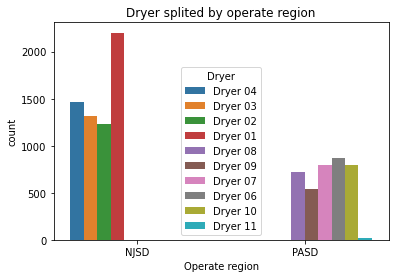

In [21]:
sns.countplot('Operate region',hue='Dryer',data=train)
plt.title('Dryer splited by operate region')
plt.show()

In [22]:
print('Highest yield percentage is of:',df['YieldPercentage'].max(),'%')
print('Lowest yield percentage is of:',df['YieldPercentage'].min(),'%')
print('Average yield percentage is of:',df['YieldPercentage'].mean(),'%')

Highest yield percentage is of: 100.0 %
Lowest yield percentage is of: 0.0 %
Average yield percentage is of: 90.58754783328187 %


In [23]:
df[df['YieldPercentage'] == 0]

,OrderEntryDate,OrginalScheduleDate,ActualStartDate,ReleaseDate,BatchNumber,CustItem,Dryer,ScheduledDryQty,ActualDryQty,YieldPercentage,DryingTime_Hrs,CleanTime_Hrs,DownTime_Hrs,TotalRunTime_Hrs,ProdLine,ContainerNet,ContainerID,Operate region
215,2/4/16 15:46,2/4/16 15:45,2/13/16 7:07,2/4/16 15:46,PASD315791,10091-0000,Dryer 06,3808.0286,NaN,0.0,3.1,0.0,0.1,3.2,Nutraceutical,55.1,115721.0,PASD
4176,4/18/18 14:01,4/18/18 14:00,4/18/18 15:40,4/18/18 14:01,PASD346779,41902-0000,Dryer 10,979.9995,NaN,0.0,2.6,7.4,0.0,10.0,Flavors,50.0,115724.0,PASD
8093,1/27/20 16:32,2/19/20 16:31,2/13/20 16:12,2/12/20 14:23,PASD367054,47846-0000,Dryer 09,18.7014,NaN,0.0,10.2,3.4,7.5,21.1,Food Additive,50.0,115724.0,PASD
9208,8/4/20 8:19,8/4/20 8:17,8/26/20 13:37,8/4/20 8:48,PASD374287,48494-0000,Dryer 06,392.5204,0.1,0.0,0.1,7.8,4.5,12.4,Flavors,44.1,115724.0,PASD
9754,11/18/20 11:07,11/18/20 11:05,11/23/20 11:31,11/18/20 11:07,PASD378847,41902-0000,Dryer 11,490.0008,NaN,0.0,0.0,16.0,0.0,0.0,Flavors,50.0,115724.0,PASD


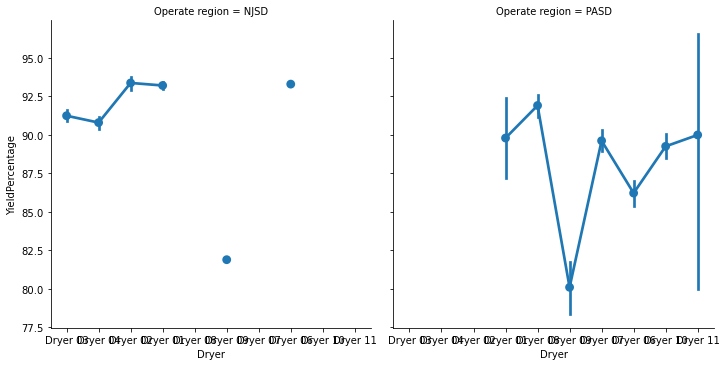

<Figure size 3600x3600 with 0 Axes>

In [36]:
sns.factorplot('Dryer','YieldPercentage',col='Operate region',data=df)
plt.figure(figsize=(50, 50))
plt.show()

In [28]:
df['ProdLine'].value_counts().to_frame().style.background_gradient(cmap='summer')

,ProdLine
Flavors,5197
Fragrance,2137
Chemical,691
Nutraceutical,635
Food Additive,487
Vitamin,271
Food Addit,122
Pharma,84
Cosmetic,50


In [35]:
df.groupby(['Operate region','ProdLine'])['ProdLine'].count().to_frame()

ProdLine
Operate region ProdLine               
NJSD           Chemical            285
               Cosmetic             44
               Flavors            3216
               Food Addit           56
               Food Additive       180
               Fragrance          2136
               Nutraceutical        36
               Pharma               37
               Vitamin              63
PASD           Chemical            406
               Cosmetic              6
               Flavors            1981
               Food Addit           66
               Food Additive       307
               Fragrance             1
               Nutraceutical       599
               Pharma               47
               Vitamin             208

In [27]:
df['ContainerID'].value_counts()

500296.0    1077
501889.0     873
115724.0     833
90263.0      735
115721.0     486
            ... 
114350.0       1
120577.0       1
506043.0       1
509058.0       1
502052.0       1
Name: ContainerID, Length: 160, dtype: int64

In [1]:
import plotly as py
import plotly.figure_factory as ff

pyplt = py.offline.plot

df = [dict(Task = "task1", Start = '2015-12-03', Finish = '2016-01-02'),
      dict(Task = "task2", Start = '2015-10-29', Finish = '2015-12-26'),
      dict(Task = "task3", Start = '2015-12-03', Finish = '2016-01-02')]

fig = ff.create_gantt(df)
pyplt(fig)

'temp-plot.html'

In [ ]:
'''DRYER
NC 5, PA 6
Yield > 100% error data
PA flavor only
'''